In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import warnings
warnings.filterwarnings('ignore')


# Loading Data

In [2]:
df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df2=df1.drop(['availability','society','area_type','balcony'],axis='columns')
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


# Data Cleaning

In [5]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2=df2.dropna()
df2.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [7]:
df2.shape

(13246, 5)

In [8]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

In [9]:
def bedroom(x):
    return int(x.split(" ")[0])


In [10]:
df2['BHK']=df2['size'].apply(lambda x: bedroom(x))
df2

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [11]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def cleansqft(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df2[~df2['total_sqft'].apply(cleansqft)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def sqft_to_int(x):
    y=[]
    y=x.split("-")
    if len(y)==2:
        return (float(y[0])+float(y[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df3=df2.copy()
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [17]:
df3['Total_sqft']=df2['total_sqft'].apply(sqft_to_int)
df3.head(10)

,location,size,total_sqft,bath,price,BHK,Total_sqft
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0
5,Whitefield,2 BHK,1170,2.0,38.00,2,1170.0
6,Old Airport Road,4 BHK,2732,4.0,204.00,4,2732.0
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4,3300.0
8,Marathahalli,3 BHK,1310,3.0,63.25,3,1310.0
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6,1020.0


In [18]:
df3['Total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [19]:
df3.loc[30]

location        Yelahanka
size                4 BHK
total_sqft    2100 - 2850
bath                  4.0
price               186.0
BHK                     4
Total_sqft         2475.0
Name: 30, dtype: object

In [20]:
df3=df3.drop('total_sqft',axis='columns')
df3

,location,size,bath,price,BHK,Total_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,2.0,51.00,2,1200.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0


In [21]:
df4=df3.copy()
df4['price_per_sqft']=df3['price']*100000/df3['Total_sqft']
df4

,location,size,bath,price,BHK,Total_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,Richards Town,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [22]:
len(df4.location.unique())

1304

In [23]:
df4.location=df4.location.apply(lambda x: x.strip())
loc_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
loc_stats


location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
len(loc_stats)

1293

In [25]:
len(loc_stats[loc_stats<=10])

1052

In [26]:
loc_lessthan_10=loc_stats[loc_stats<=10]
loc_lessthan_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
df4.location=df4.location.apply(lambda x: 'other' if x in loc_lessthan_10 else x)
len(df4.location.unique())

242

In [28]:
df4[df4.Total_sqft/df4.BHK <300]

,location,size,bath,price,BHK,Total_sqft,price_per_sqft
9,other,6 Bedroom,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,8 Bedroom,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,6 Bedroom,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,7.0,85.0,8,1350.0,6296.296296
70,other,3 Bedroom,3.0,100.0,3,500.0,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,7.0,218.0,7,1400.0,15571.428571
13279,other,6 Bedroom,5.0,130.0,6,1200.0,10833.333333
13281,Margondanahalli,5 Bedroom,5.0,125.0,5,1375.0,9090.909091
13303,Vidyaranyapura,5 Bedroom,5.0,70.0,5,774.0,9043.927649


In [29]:
df5=df4[~(df4.Total_sqft/df4.BHK <300)]
df5

,location,size,bath,price,BHK,Total_sqft,price_per_sqft
0,Electronic City Phase II,2 BHK,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,3 BHK,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3 BHK,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2 BHK,2.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,4.0,231.00,5,3453.0,6689.834926
13316,other,4 BHK,5.0,400.00,4,3600.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,2.0,60.00,2,1141.0,5258.545136
13318,Padmanabhanagar,4 BHK,4.0,488.00,4,4689.0,10407.336319


In [30]:
def delete_outliers(df):
    df6=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        standard_dev=np.std(subdf.price_per_sqft)
        new_df=subdf[(subdf.price_per_sqft>(m-standard_dev)) & (subdf.price_per_sqft<=(m+standard_dev))]
        df6=pd.concat([df6,new_df],ignore_index=True)
    return df6

In [31]:
df7=delete_outliers(df5)
df7

,location,size,bath,price,BHK,Total_sqft,price_per_sqft
0,1st Block Jayanagar,4 BHK,4.0,428.00,4,2850.0,15017.543860
1,1st Block Jayanagar,3 BHK,3.0,194.00,3,1630.0,11901.840491
2,1st Block Jayanagar,3 BHK,2.0,235.00,3,1875.0,12533.333333
3,1st Block Jayanagar,3 BHK,2.0,130.00,3,1200.0,10833.333333
4,1st Block Jayanagar,2 BHK,2.0,148.00,2,1235.0,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,2.0,110.00,2,1353.0,8130.081301
10237,other,1 Bedroom,1.0,26.00,1,812.0,3201.970443
10238,other,3 BHK,2.0,63.93,3,1440.0,4439.583333
10239,other,2 BHK,2.0,48.00,2,1075.0,4465.116279


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


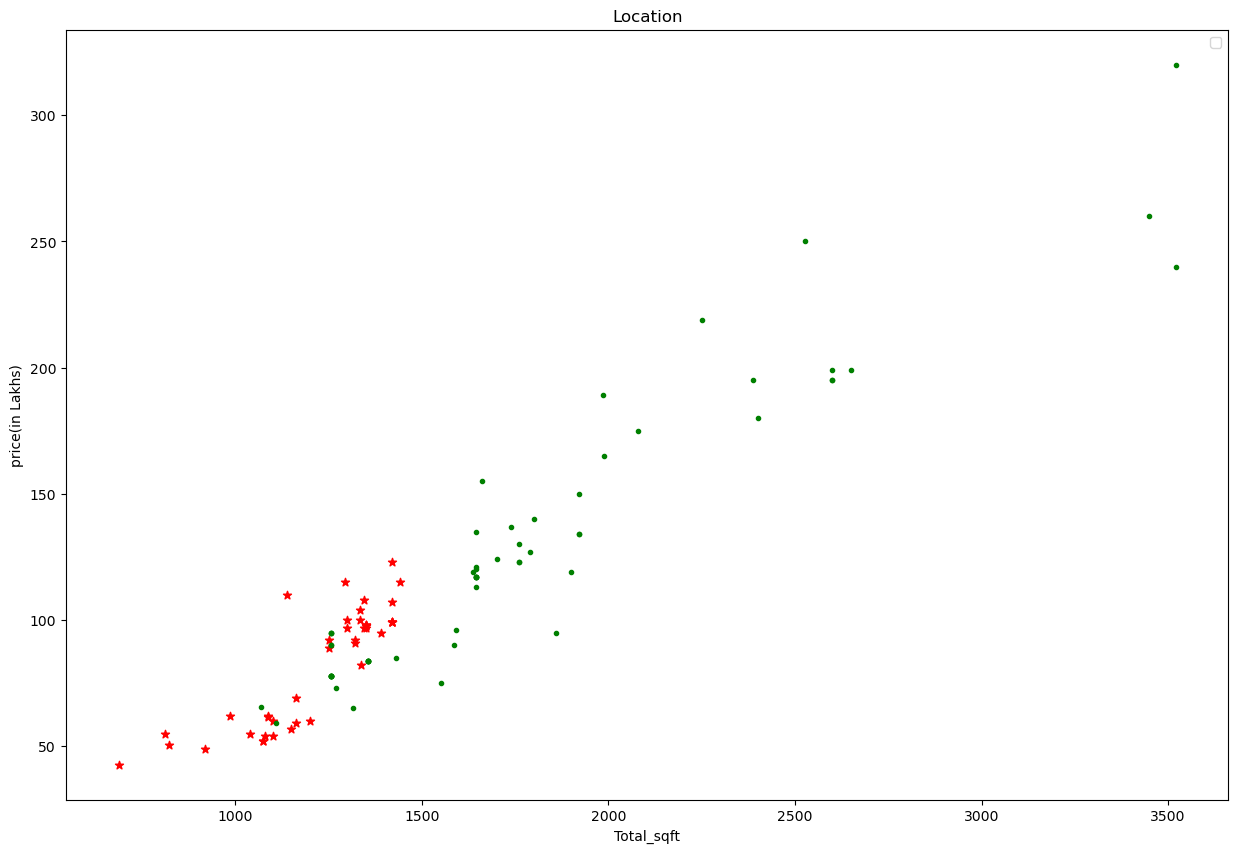

In [32]:
def bedroom_price_graph(df,location):
    bhk2=df[(df.BHK==2) & (df.location==location)]
    bhk3=df[(df.BHK==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.Total_sqft,bhk2.price,marker='*',color='red')
    plt.scatter(bhk3.Total_sqft,bhk3.price,marker='.',color='green')
    plt.xlabel('Total_sqft')
    plt.ylabel('price(in Lakhs)')
    plt.title('Location')
    plt.legend()
bedroom_price_graph(df7,"Hebbal")
    

In [33]:
def remove_bedroom(df):
    indices=np.array([])
    for location, location_df in df.groupby('location'):
        stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'standard deviation':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            st=stats.get(bhk-1)
            if st and st['count']>5:
                indices=np.append(indices,bhk_df[bhk_df.price_per_sqft<(st['mean'])].index.values)
    return df.drop(indices,axis='index')
                
df8=remove_bedroom(df7)
df8.shape

(7329, 7)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


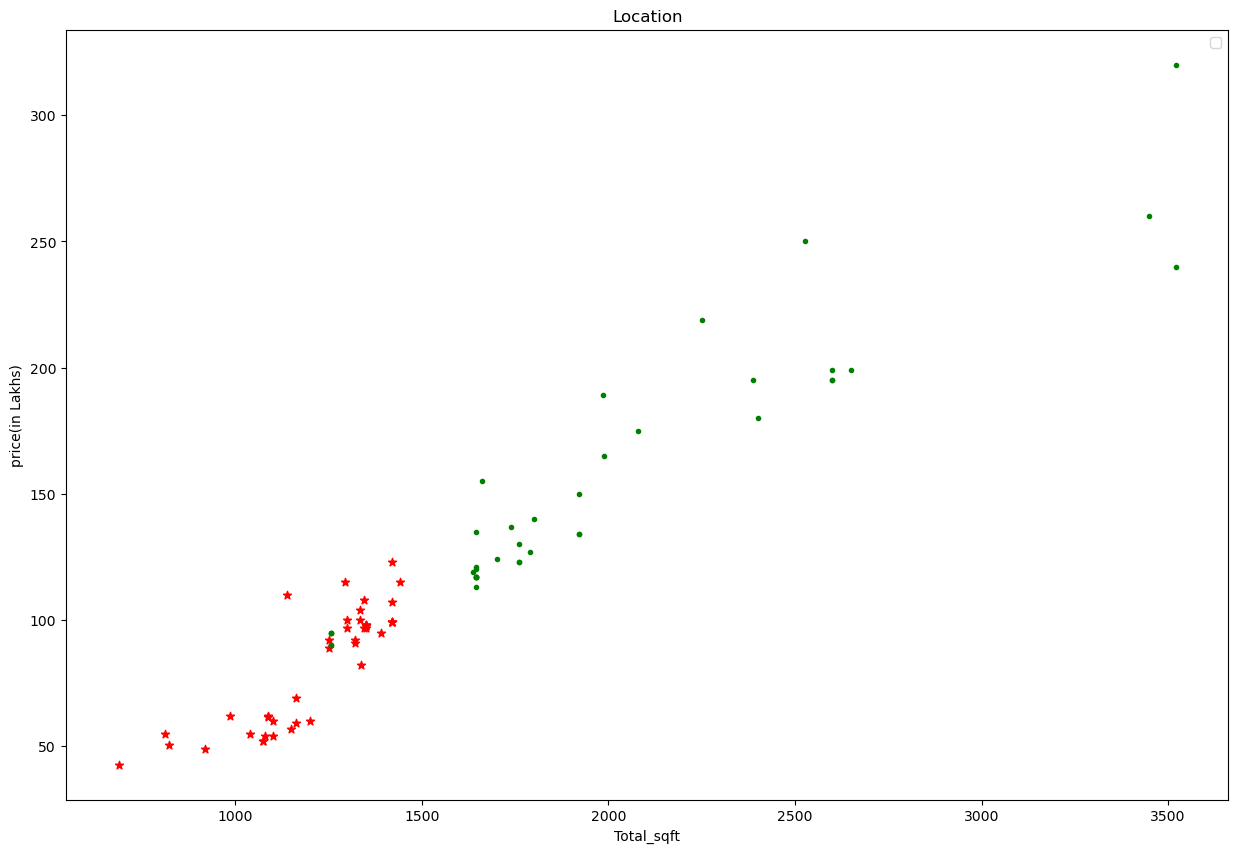

In [34]:
bedroom_price_graph(df8,"Hebbal")

Text(0, 0.5, 'Count')

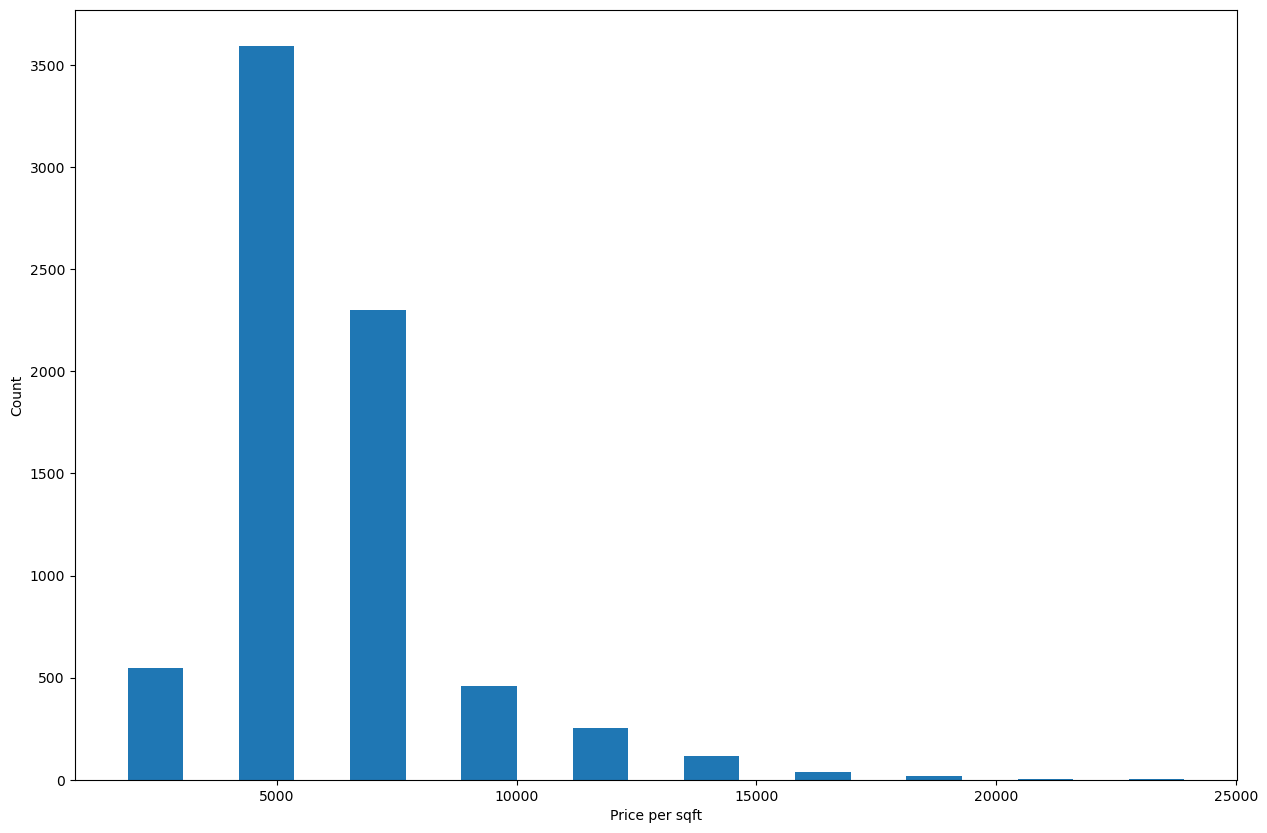

In [35]:
plt.hist(df8.price_per_sqft,rwidth=0.5)
plt.xlabel("Price per sqft")
plt.ylabel("Count")

In [36]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [37]:
df8[df8.bath>df8.BHK+2]

,location,size,bath,price,BHK,Total_sqft,price_per_sqft
1626,Chikkabanavar,4 Bedroom,7.0,80.0,4,2460.0,3252.032520
5238,Nagasandra,4 Bedroom,8.0,450.0,4,7000.0,6428.571429
6711,Thanisandra,3 BHK,6.0,116.0,3,1806.0,6423.034330
8411,other,6 BHK,9.0,1000.0,6,11338.0,8819.897689


In [38]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 7)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(x,y):
  algos = {
      'linear regression' : {
          'model': LinearRegression(),
          'params':{ 
              
          }
      },
      'lasso': {
          'model': Lasso(),
          'params':{
              'alpha':[1,2],
              'selection': ['random','cyclic']
          }
      },
      'decision tree':{
          'model': DecisionTreeRegressor(),
          'params':{
              'criterion':['mse', 'friedman_mse'],
              'splitter':['best', 'random']
          }
      }
  }
  scores = []
  cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
    gs.fit(X_train, y_train)
    scores.append({
        'model': algo_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

  return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X,y)

,model,best_score,best_params
0,linear regression,0.845912,{}
1,lasso,0.697275,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.669246,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [40]:
df9=df9.drop(['size','price_per_sqft'],axis='columns')
df9.head()

,location,bath,price,BHK,Total_sqft
0,1st Block Jayanagar,4.0,428.0,4,2850.0
1,1st Block Jayanagar,3.0,194.0,3,1630.0
2,1st Block Jayanagar,2.0,235.0,3,1875.0
3,1st Block Jayanagar,2.0,130.0,3,1200.0
4,1st Block Jayanagar,2.0,148.0,2,1235.0


# One Hot Encoding

In [41]:
dummies=pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,bath,price,BHK,Total_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,2.0,130.0,3,1200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2.0,148.0,2,1235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df10.shape

(7251, 246)

In [44]:
df11=df10.drop('location',axis='columns')
df11.shape

(7251, 245)

In [45]:
X=df11.drop('price',axis='columns')
X.shape

(7251, 244)

In [46]:
y=df11.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

# Model Training 

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [48]:
X_train.shape

(5800, 244)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8452277697874735

In [50]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [58]:
def price_prediction(location,sqft,bath,bhk):
    if location in X.columns:
        loc_index=np.where(X.columns==location)[0][0]
    else:
        loc_index=-1
    x=np.zeros(len(X.columns))
    x[0]=bath
    x[1]=bhk
    x[2]=sqft
    if loc_index>=0:
        x[loc_index]=1
    return lr.predict([x])[0]
    

# Model Testing

In [59]:
price_prediction('1st Phase JP Nagar',1000,2,2)

83.49904677000714

In [60]:
price_prediction('1st Block Jaya Nagar',1000,2,2)

81.88929546004505

In [61]:
price_prediction('1st Phase JP Nagar', 1000, 3, 3)

86.8051939502221

In [62]:
price_prediction('Yelahanka',3000,4,4)

212.04421488511372